__Project work__

Проверка гипотезы: средняя оценка фильмов жанра "Ужасы"(Horror), снятых за последние 20 лет, значительно ниже других жанров. Для сравнения будут использованы жанры "Драма"(Drama), "Комедия"(Comedy), "Боевик"(Action). Для упрощения фильмы, характеризующиеся одновременно несколькими жанрами (Драма, Комедия, Боевик), учитываться не будут. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

%matplotlib inline

In [81]:
pd.set_option("max_rows", 10)

#### Просмотрим общую информацию о датасете:

In [2]:
data1 = pd.read_csv('title.basics.tsv.gz', sep='\t', encoding='utf-8')
data2 = pd.read_csv('title.ratings.tsv.gz', sep='\t', encoding='utf-8')

/home/dmitry/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [97]:
basics = data1.copy()
ratings = data2.copy()

In [98]:
basics.shape

(6044346, 9)

In [99]:
ratings.shape

(956871, 3)

In [100]:
basics.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Exiting the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In [101]:
ratings.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.8,1525
1,tt0000002,6.3,185
2,tt0000003,6.6,1172
3,tt0000004,6.3,113
4,tt0000005,6.2,1885
5,tt0000006,5.3,101
6,tt0000007,5.5,608
7,tt0000008,5.6,1631
8,tt0000009,5.5,80
9,tt0000010,6.9,5423


In [102]:
basics['titleType'].unique()

array(['short', 'movie', 'tvMovie', 'tvSeries', 'tvEpisode', 'tvShort',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

#### Будем работать с жанром 'movie'

In [103]:
basics = basics.loc[(basics['titleType'] == 'movie')]

In [104]:
basics = basics.loc[(basics['startYear'] != '\\N')]

In [105]:
basics.count()

tconst            465169
titleType         465169
primaryTitle      465169
originalTitle     465169
isAdult           465169
startYear         465169
endYear           465169
runtimeMinutes    465169
genres            465169
dtype: int64

#### Объединим наши датасеты:

In [106]:
df = basics.set_index('tconst').join(ratings.set_index('tconst'))

In [107]:
df.head()

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,,,,
tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.5,80.0
tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport",5.2,301.0
tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,\N,"Biography,Drama",6.3,39.0
tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,NaN,NaN
tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama",6.2,518.0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 465169 entries, tt0000009 to tt9916754
Data columns (total 10 columns):
titleType         465169 non-null object
primaryTitle      465169 non-null object
originalTitle     465169 non-null object
isAdult           465169 non-null int64
startYear         465169 non-null object
endYear           465169 non-null object
runtimeMinutes    465169 non-null object
genres            465169 non-null object
averageRating     236666 non-null float64
numVotes          236666 non-null float64
dtypes: float64(2), int64(1), object(7)
memory usage: 59.0+ MB


#### Конвертируем колонку 'startYear' в int64

In [109]:
df['startYear'] = pd.to_numeric(df['startYear'])

#### Отбросим все фильмы без рейтинга и фильмы старше 20 лет: 

In [110]:
df = df[df.startYear > 1999]
df = df[df['averageRating'].notnull()]

In [111]:
df.count()

titleType         119847
primaryTitle      119847
originalTitle     119847
isAdult           119847
startYear         119847
endYear           119847
runtimeMinutes    119847
genres            119847
averageRating     119847
numVotes          119847
dtype: int64

In [112]:
df['genres'].value_counts().head(30)

Drama                            19902
Documentary                      17258
Comedy                            9381
Comedy,Drama                      4434
Horror                            3790
                                 ...  
Biography,Documentary,History      557
Horror,Mystery,Thriller            552
Action,Comedy                      527
Animation                          518
Action,Thriller                    510
Name: genres, Length: 30, dtype: int64

#### Посмотрим распределение оценок для каждого из жанров по годам: 

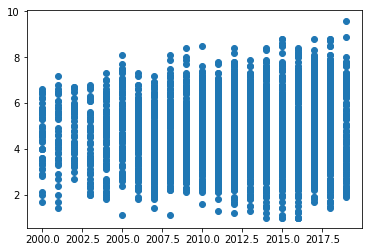

In [113]:
plt.scatter(df.loc[df['genres'] == 'Horror', 'startYear'],
            df.loc[df['genres'] == 'Horror', 'averageRating']);

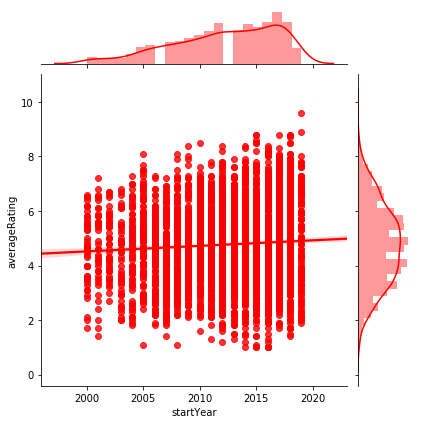

In [114]:
sns.jointplot(df.loc[(df['genres'] == 'Horror', 'startYear')],
            df.loc[df['genres'] == 'Horror', 'averageRating'],kind='reg', color='r');

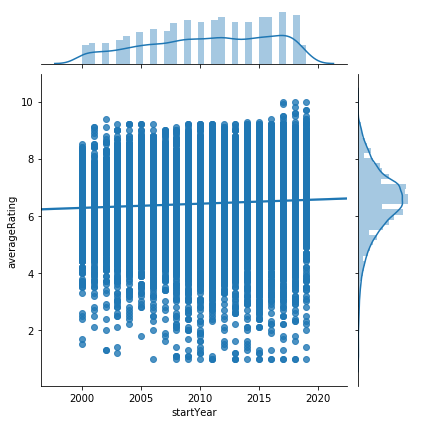

In [115]:
sns.jointplot(df.loc[(df['genres'] == 'Drama', 'startYear')],
            df.loc[df['genres'] == 'Drama', 'averageRating'],kind='reg');

#### Уже на примере жанра "Драма" видна значительно более высокая оценка. Проверием Боевики и Комедии: 

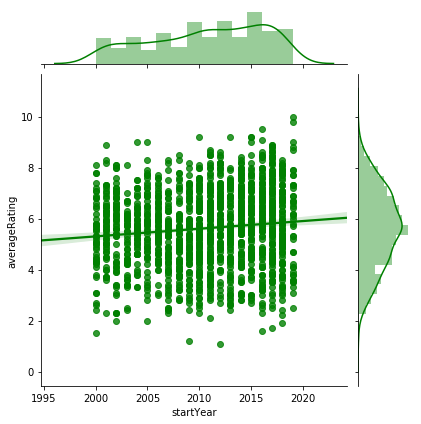

In [117]:
sns.jointplot(df.loc[(df['genres'] == 'Action', 'startYear')],
            df.loc[df['genres'] == 'Action', 'averageRating'],kind='reg', color='g');

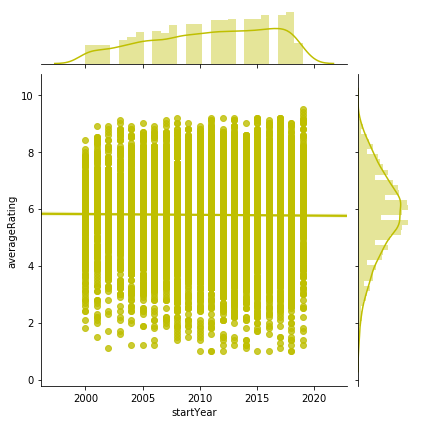

In [118]:
sns.jointplot(df.loc[(df['genres'] == 'Comedy', 'startYear')],
            df.loc[df['genres'] == 'Comedy', 'averageRating'],kind='reg', color='y');

#### Оставим в датасете только интересующие нас жанры и подсчитаем общее количество фильмов по каждому из них

In [119]:
df = df.loc[(df['genres'] == 'Horror') | (df['genres'] == 'Drama') | (df['genres'] == 'Action') | (df['genres'] == 'Comedy')]

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34686 entries, tt0069049 to tt9914942
Data columns (total 10 columns):
titleType         34686 non-null object
primaryTitle      34686 non-null object
originalTitle     34686 non-null object
isAdult           34686 non-null int64
startYear         34686 non-null int64
endYear           34686 non-null object
runtimeMinutes    34686 non-null object
genres            34686 non-null object
averageRating     34686 non-null float64
numVotes          34686 non-null float64
dtypes: float64(2), int64(2), object(6)
memory usage: 2.9+ MB


In [121]:
df.set_index(["genres", "averageRating"]).count(level="genres")

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,numVotes
genres,,,,,,,,
Action,1613,1613,1613,1613,1613,1613,1613,1613
Comedy,9381,9381,9381,9381,9381,9381,9381,9381
Drama,19902,19902,19902,19902,19902,19902,19902,19902
Horror,3790,3790,3790,3790,3790,3790,3790,3790


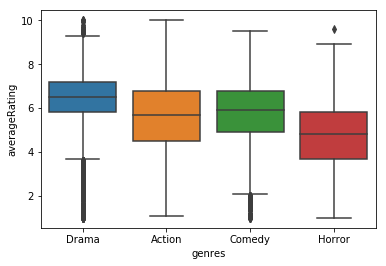

In [123]:
sns.boxplot(x=df['genres'], y=df['averageRating']);

#### Возьмем случайную выборку из 1500 наблюдений по каждому жанру и будем работать с оценками для каждого из жанров:

In [131]:
n_sample = 1500

In [137]:
horror_sample = df.loc[df['genres'] == 'Horror'].sample(n = n_sample, random_state=42).averageRating.values

horror_sample

array([4.5, 3.9, 4.9, ..., 3.5, 6.1, 6. ])

In [138]:
drama_sample = df.loc[df['genres'] == 'Drama'].sample(n = n_sample, random_state=42).averageRating.values

drama_sample

array([7.1, 6.1, 6.8, ..., 7.3, 6.3, 6.6])

In [140]:
action_sample = df.loc[df['genres'] == 'Action'].sample(n = n_sample, random_state=42).averageRating.values

action_sample

array([5.8, 6.2, 3.9, ..., 7.7, 3.6, 6. ])

In [141]:
comedy_sample = df.loc[df['genres'] == 'Comedy'].sample(n = n_sample, random_state=42).averageRating.values

comedy_sample

array([8.4, 7.7, 5.8, ..., 6.6, 5.4, 5.4])

In [145]:
print("Horror movies: {} \nDrama movies: {} \nAction movies: {} \nComedy movies: {}".format
      (len(horror_sample), len(drama_sample), len(action_sample), len(comedy_sample)))

Horror movies: 1500 
Drama movies: 1500 
Action movies: 1500 
Comedy movies: 1500


#### Найдем средние значения оценок по каждому жанру:

In [151]:
horror_mean = horror_sample.mean()
drama_mean = drama_sample.mean()
action_mean = action_sample.mean()
comedy_mean = comedy_sample.mean()

horror_var = horror_sample.var(ddof=1)
drama_var = drama_sample.var(ddof=1)
action_var = action_sample.var(ddof=1)
comedy_var = comedy_sample.var(ddof=1)

In [153]:
print('Horror rating: mean = {}, std = {}'.format(horror_mean, np.sqrt(horror_var)))
print('Drama rating: mean = {}, std = {}'.format(drama_mean, np.sqrt(drama_var)))
print('Action rating: mean = {}, std = {}'.format(action_mean, np.sqrt(action_var)))
print('Comedy rating: mean = {}, std = {}'.format(comedy_mean, np.sqrt(comedy_var)))

Horror rating: mean = 4.724933333333333, std = 1.468351354191198
Drama rating: mean = 6.4042666666666666, std = 1.2249661860612935
Action rating: mean = 5.621200000000001, std = 1.5301911263811145
Comedy rating: mean = 5.8129333333333335, std = 1.4647171489539708
